# TOS2CA Binder for Plotting Interpolated Data (All Anomalies)
This Jupyter notebook shows how to plot all anomalies at a specific timestep, with an interpolated file from the [TOS2CA system](https://nasa-jpl.github.io/tos2ca-documentation/).

## Import libraries
At a minimum, we will need:
* netCDF4
* numpy
* matplotlib
* cartopy

We'll import them in the cell below.  See the requirements.txt file for additional information.

In [10]:
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

## Open the file
Now, we'll open the sample interpolated file, using the netCDF4 library.  This file uses jobID #398 from the TOS2CA system, as you can see in the first part of the filename.  

This sample data happens to be from the NASA Global Precipitation Monitor's [GPM_3IMERGHH](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGHH_07/summary?keywords=GPM_3IMERGHH) data set, and shows the `precipitation` variable.

In [11]:
filename = 'sample_data/398-Interpolated-Data.nc4'
rootgrp_interp = Dataset(filename,"r+", format="NETCDF4")

## Select a timestamp and anomaly
There can be several timestamps in an interpolated file, and each timestamp will have data for each anomaly that was active at that time.  Timestamps will be in YYYYMMDDHHMM format. Here we identify the timestamp we are interested in.  

In this example, we'll use 01-04-2020 07:30 as the timestamp.

In [12]:

timestamp_interp = '202001052100'

## Setup
To get setup to plot the data, we'll create empty arrays of latitude, longitude, and our data.  We'll also find out which anomalies are available in this timestamp group.

In [ ]:
lat_array = []
lon_array = []
interp_array = []  

anomaly_num = np.sort(list(set(rootgrp_interp.groups[timestamp_interp].groups)))



timestamp: 202001052100


## Read the data
Now, we'll loop through the anomaly groups, reading out the data for each anomaly at our timestamp.  The lat, lon, and data values will be appended to the arrays we setup above.

In [14]:

for anomaly_id in anomaly_num: 
        
    print("processing anomaly id: ", anomaly_id)
    data = rootgrp_interp.groups[timestamp_interp].groups[str(anomaly_id)].variables[rootgrp_interp.Variable][...].data
    lat_array = np.append(lat_array, data[:, 0])
    lon_array = np.append(lon_array, data[:, 1])
        
    data_array = np.where(data[:, 2]>=0, data[:, 2], np.nan)
    interp_array = np.append(interp_array, data_array)

processing anomaly id:  38
processing anomaly id:  49
processing anomaly id:  50
processing anomaly id:  51
processing anomaly id:  52


## Plot the data
Setup the plot (we're using the 'seaborn-v0_8-poster' style here), with axes, titles, and colorbars.  Then plot and display the data.

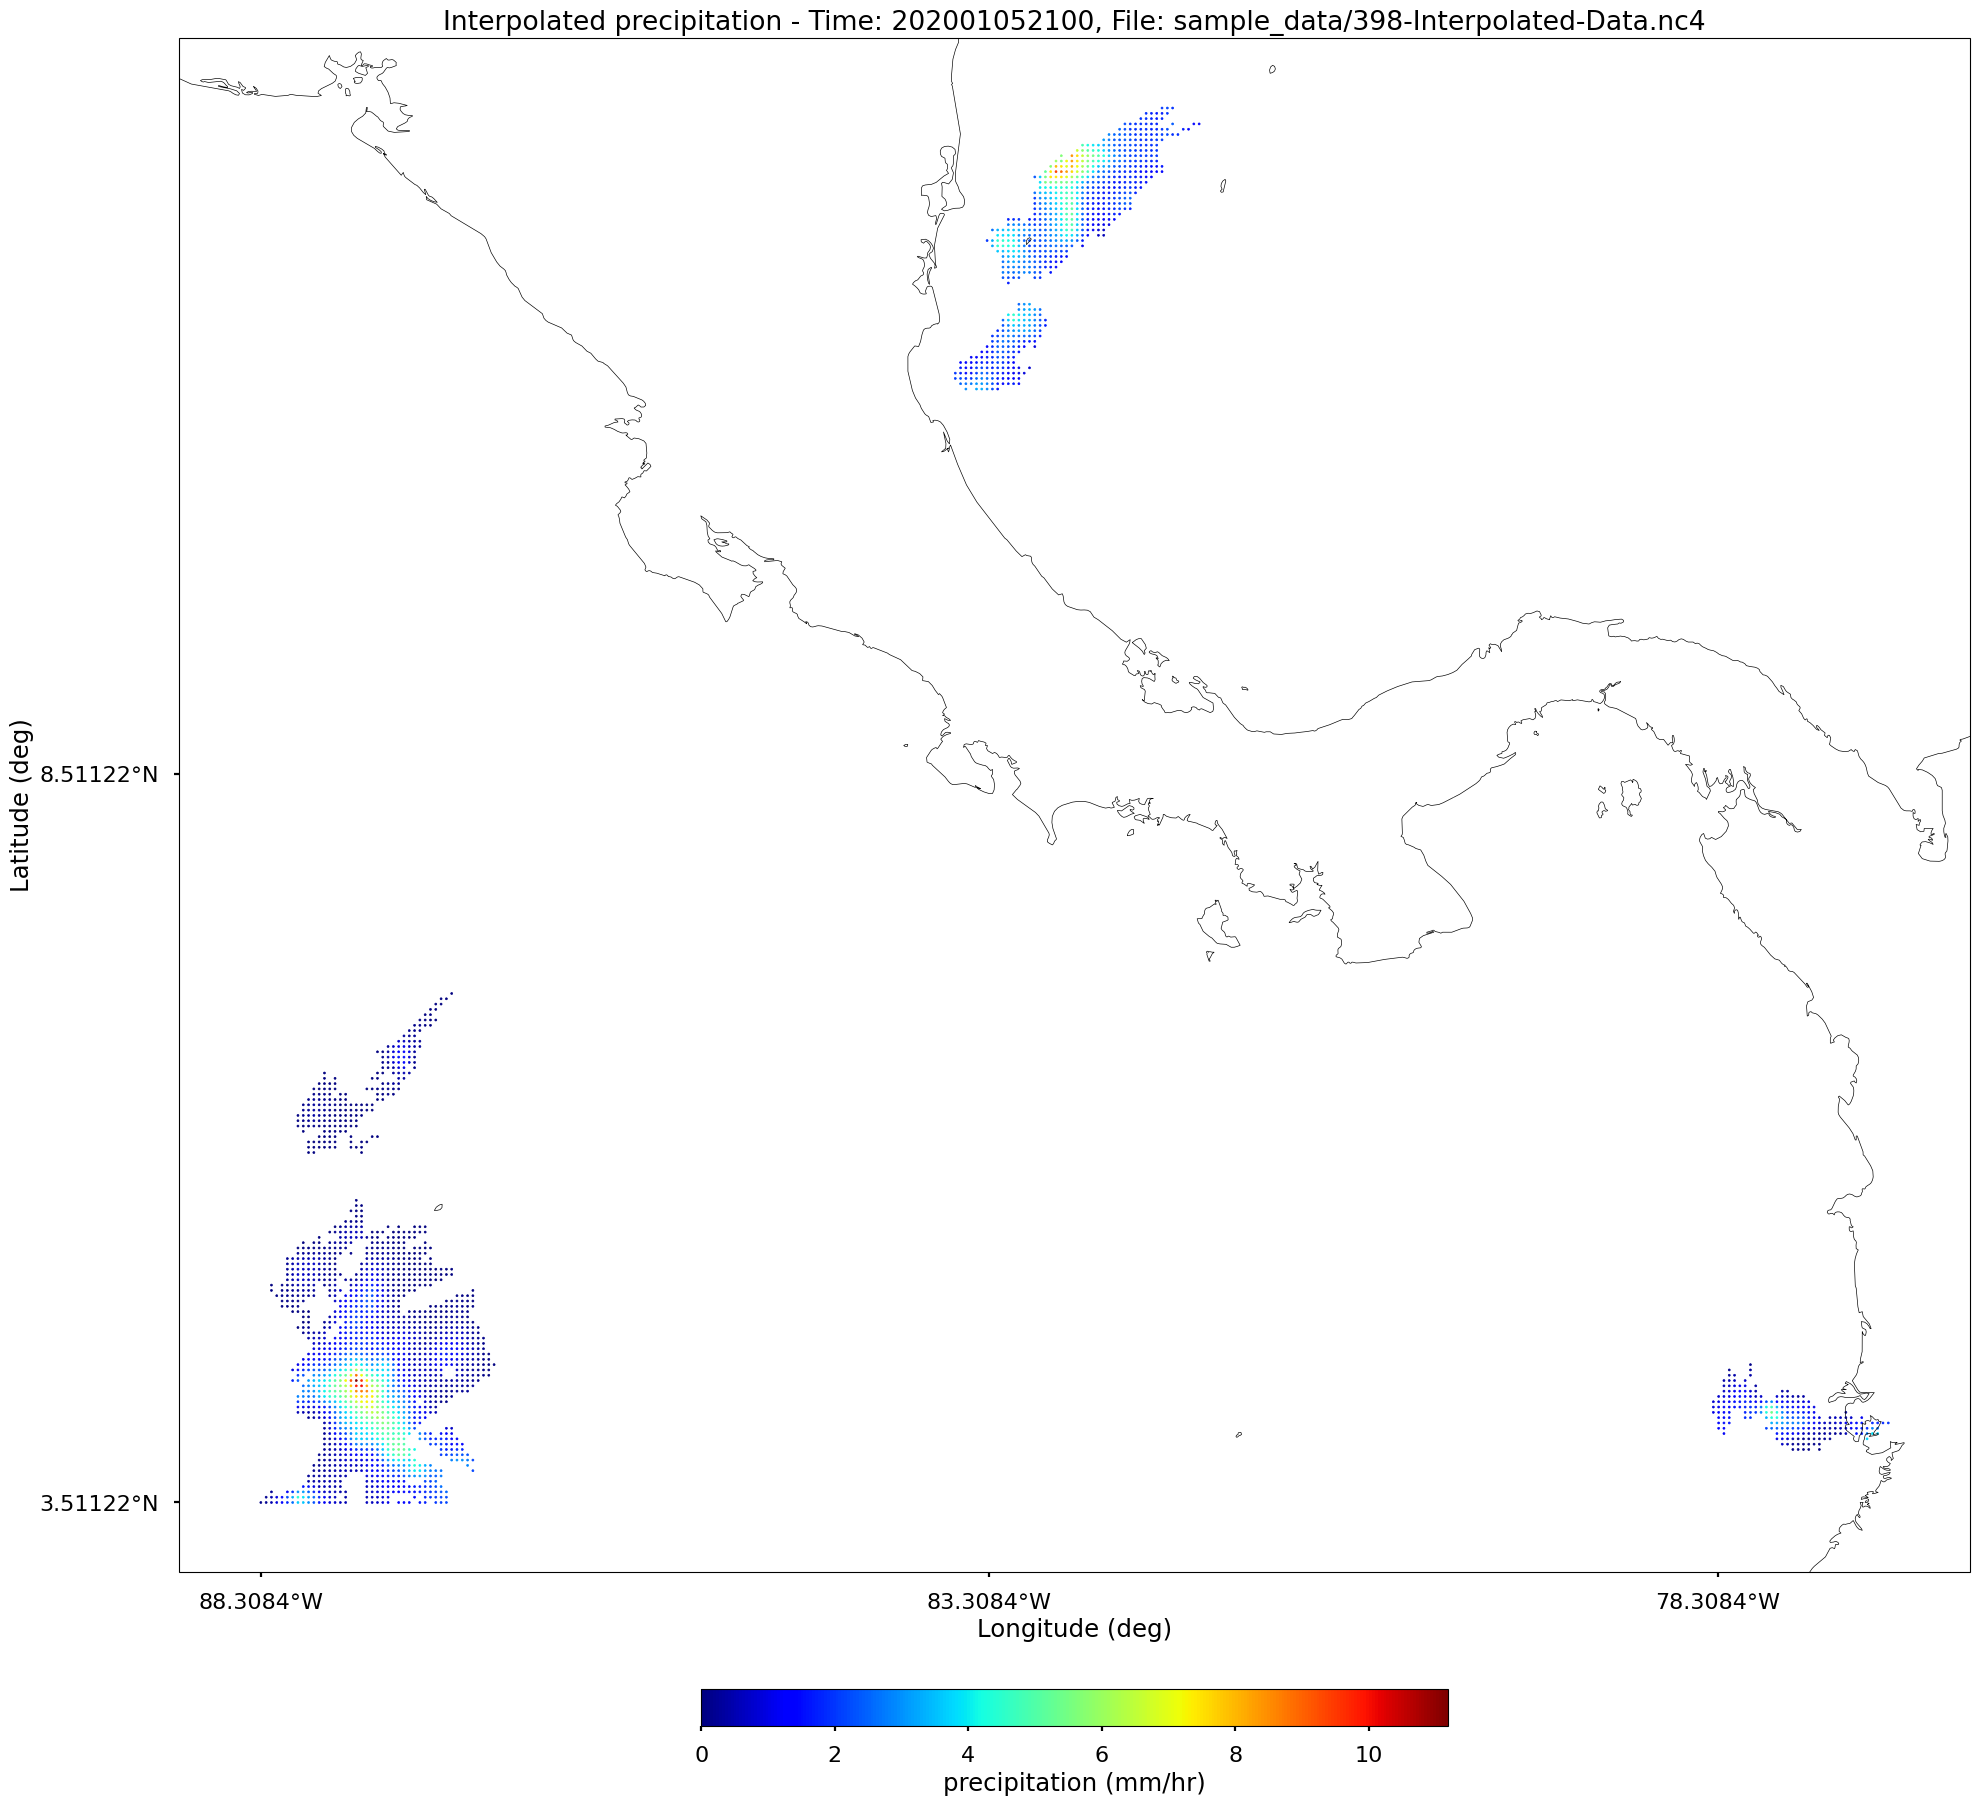

In [16]:
plt.style.use(['seaborn-v0_8-poster'])
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111, projection=ccrs.PlateCarree())

plt.scatter(lon_array, lat_array, s = 2, c= interp_array, transform=ccrs.PlateCarree(), cmap = 'jet')
plt.colorbar(label = rootgrp_interp.Variable + ' ('+rootgrp_interp.Units+')', orientation =  'horizontal', shrink = 0.4, pad = 0.06)

ax.set_yticks(np.arange(min(lat_array),max(lat_array), 5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_xticks(np.arange(min(lon_array),max(lon_array), 5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
    
ax.coastlines()


plt.title('Interpolated '+rootgrp_interp.Variable+' - Time: '+timestamp_interp +', File: '+filename)
plt.ylabel('Latitude (deg)')
plt.xlabel('Longitude (deg)')
fig.canvas.draw()
plt.tight_layout()